<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 142.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 183.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 136.9 MB/s eta 0:00:00


In [8]:
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-08-24 12:37:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.9MB/s    in 2.4s    

2025-08-24 12:37:18 (63.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [15]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [16]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


/tmp/ipykernel_299/1863840637.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()


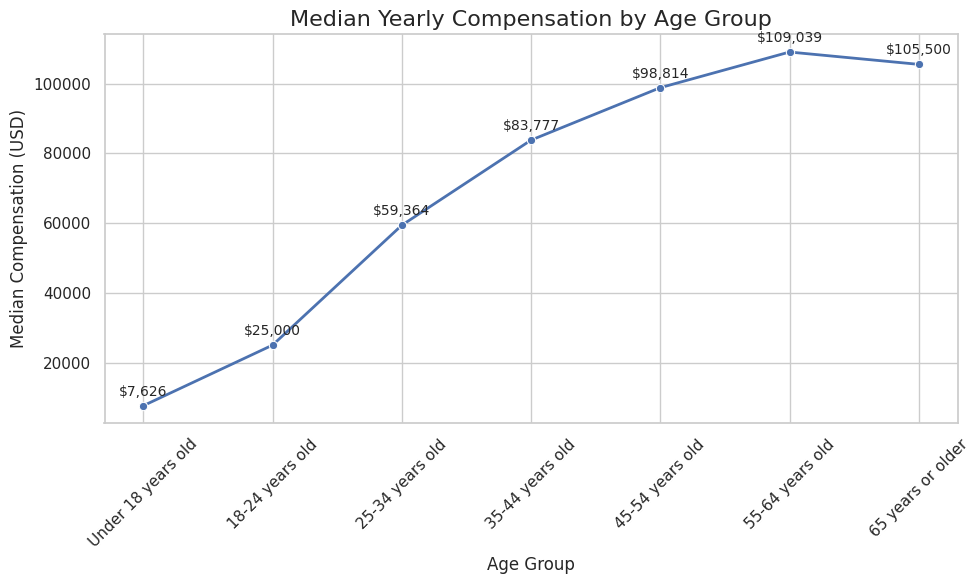

In [18]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')
df = pd.read_sql_query("SELECT Age, ConvertedCompYearly FROM main", conn)
conn.close()

# Keep only valid compensation values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['Age', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] <= 500000]  # optional outlier filter

# Clean Age strings (remove extra spaces if any)
df['Age'] = df['Age'].str.strip()

# Optional: order age groups
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Median compensation per age group
median_comp = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=median_comp, x='Age', y='ConvertedCompYearly', marker='o', linewidth=2)

# Annotate median values
for i, row in median_comp.iterrows():
    plt.text(i, row['ConvertedCompYearly']+2000, f"${int(row['ConvertedCompYearly']):,}", 
             ha='center', va='bottom', fontsize=10)

plt.title('Median Yearly Compensation by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()





##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


/tmp/ipykernel_299/2595682346.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['Age'] = pd.Categorical(df_focus['Age'], categories=age_focus, ordered=True)
/tmp/ipykernel_299/2595682346.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp_focus = df_focus.groupby('Age')['ConvertedCompYearly'].median().reset_index()


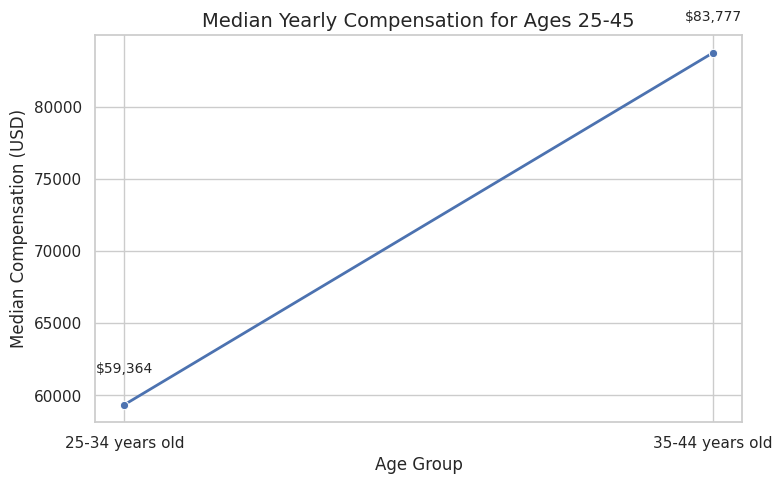

In [19]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')
df = pd.read_sql_query("SELECT Age, ConvertedCompYearly FROM main", conn)
conn.close()

# Keep only valid compensation values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['Age', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] <= 500000]  # optional outlier filter

# Clean Age strings
df['Age'] = df['Age'].str.strip()

# Filter only ages 25-45
age_focus = ['25-34 years old', '35-44 years old']
df_focus = df[df['Age'].isin(age_focus)]

# Order age groups
df_focus['Age'] = pd.Categorical(df_focus['Age'], categories=age_focus, ordered=True)

# Median compensation per age group
median_comp_focus = df_focus.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Plot line chart
plt.figure(figsize=(8,5))
sns.lineplot(data=median_comp_focus, x='Age', y='ConvertedCompYearly', marker='o', linewidth=2)

# Annotate median values
for i, row in median_comp_focus.iterrows():
    plt.text(i, row['ConvertedCompYearly']+2000, f"${int(row['ConvertedCompYearly']):,}", 
             ha='center', va='bottom', fontsize=10)

plt.title('Median Yearly Compensation for Ages 25-45', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


/tmp/ipykernel_299/2113759400.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceGroup')['JobSatPoints_6'].median().reset_index()


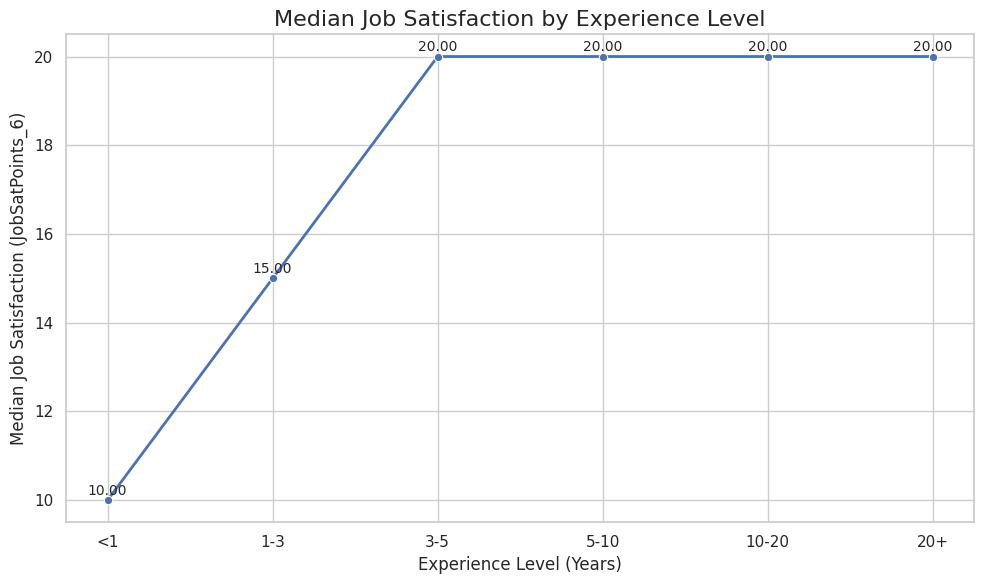

In [20]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load experience and job satisfaction
# Replace 'YearsCodePro' with another column if needed
query = """
SELECT YearsCodePro, JobSatPoints_6 
FROM main
WHERE JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Clean and convert columns
# If experience is in text like '3-5 years', we can convert to approximate numeric
def parse_years(x):
    try:
        if '-' in x:
            parts = x.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        elif x.lower() in ['less than 1 year', 'less than 1']:
            return 0.5
        elif x.lower() in ['more than 50 years', '50+ years']:
            return 50
        else:
            return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(parse_years)
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Optional: create experience bins
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1', '1-3', '3-5', '5-10', '10-20', '20+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# 4. Calculate median job satisfaction per experience group
median_satisfaction = df.groupby('ExperienceGroup')['JobSatPoints_6'].median().reset_index()

# 5. Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=median_satisfaction, x='ExperienceGroup', y='JobSatPoints_6', marker='o', linewidth=2)
plt.title('Median Job Satisfaction by Experience Level', fontsize=16)
plt.xlabel('Experience Level (Years)', fontsize=12)
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.grid(True)

# Annotate values
for i, row in median_satisfaction.iterrows():
    plt.text(i, row['JobSatPoints_6']+0.05, f"{row['JobSatPoints_6']:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


/tmp/ipykernel_299/3769484418.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp = df.groupby('ExperienceGroup')['ConvertedCompYearly'].median().reset_index()


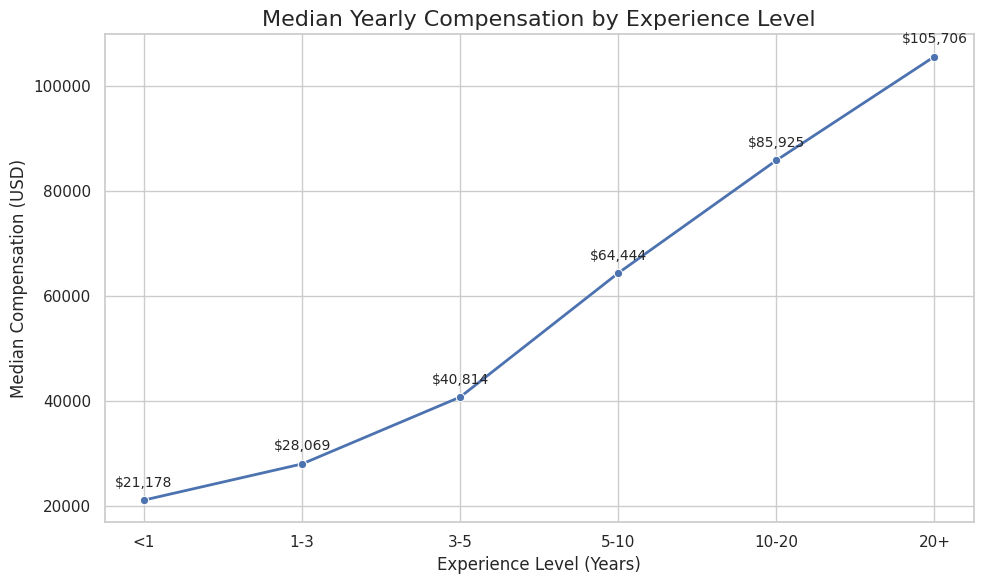

In [21]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load experience and compensation
query = """
SELECT YearsCodePro, ConvertedCompYearly 
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Clean and convert columns
# Convert YearsCodePro to approximate numeric values
def parse_years(x):
    try:
        x = str(x).strip()
        if '-' in x:
            parts = x.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        elif x.lower() in ['less than 1 year', 'less than 1']:
            return 0.5
        elif x.lower() in ['more than 50 years', '50+ years']:
            return 50
        else:
            return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(parse_years)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['YearsCodePro', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] <= 500000]  # optional outlier filter

# 4. Optional: Create experience bins
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1', '1-3', '3-5', '5-10', '10-20', '20+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# 5. Calculate median compensation per experience group
median_comp = df.groupby('ExperienceGroup')['ConvertedCompYearly'].median().reset_index()

# 6. Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=median_comp, x='ExperienceGroup', y='ConvertedCompYearly', marker='o', linewidth=2)

# Annotate median values
for i, row in median_comp.iterrows():
    plt.text(i, row['ConvertedCompYearly']+2000, f"${int(row['ConvertedCompYearly']):,}", 
             ha='center', va='bottom', fontsize=10)

plt.title('Median Yearly Compensation by Experience Level', fontsize=16)
plt.xlabel('Experience Level (Years)', fontsize=12)
plt.ylabel('Median Compensation (USD)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


/tmp/ipykernel_299/3005700948.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceGroup')['JobSatPoints_6'].median().reset_index()


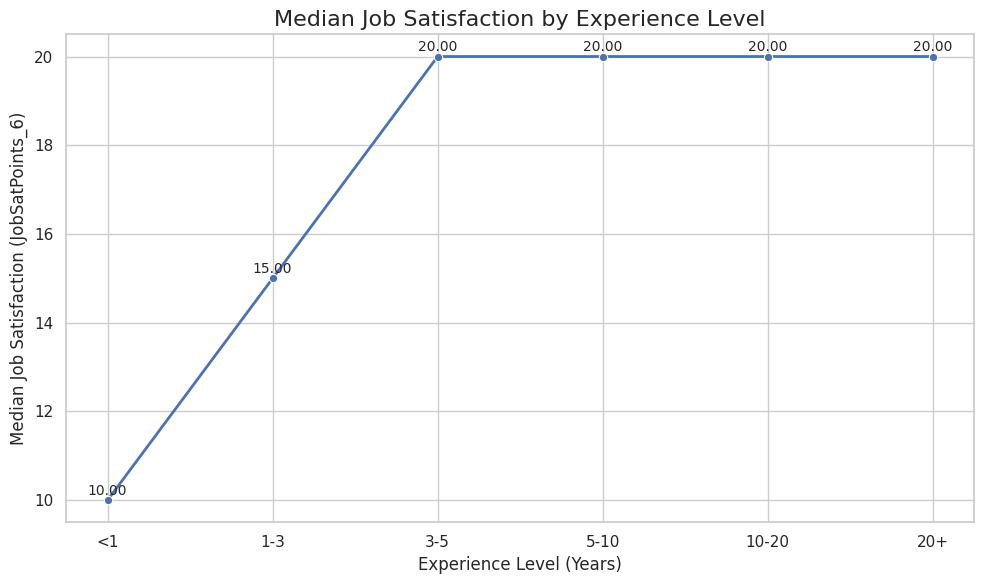

In [22]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Connect to SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# 2. Load experience and job satisfaction
query = """
SELECT YearsCodePro, JobSatPoints_6 
FROM main
WHERE JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# 3. Clean and convert experience column
def parse_years(x):
    try:
        x = str(x).strip()
        if '-' in x:
            parts = x.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        elif x.lower() in ['less than 1 year', 'less than 1']:
            return 0.5
        elif x.lower() in ['more than 50 years', '50+ years']:
            return 50
        else:
            return float(x)
    except:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(parse_years)
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# 4. Optional: create experience bins for clarity
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['<1', '1-3', '3-5', '5-10', '10-20', '20+']
df['ExperienceGroup'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# 5. Calculate median job satisfaction per experience group
median_satisfaction = df.groupby('ExperienceGroup')['JobSatPoints_6'].median().reset_index()

# 6. Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=median_satisfaction, x='ExperienceGroup', y='JobSatPoints_6', marker='o', linewidth=2)

# Annotate median values
for i, row in median_satisfaction.iterrows():
    plt.text(i, row['JobSatPoints_6']+0.05, f"{row['JobSatPoints_6']:.2f}", 
             ha='center', va='bottom', fontsize=10)

plt.title('Median Job Satisfaction by Experience Level', fontsize=16)
plt.xlabel('Experience Level (Years)', fontsize=12)
plt.ylabel('Median Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
